In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TempData = pd.read_csv("https://raw.githubusercontent.com/gindeleo/climate/master/GlobalLandTemperaturesByMajorCity.csv")

In [3]:
TempData

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [4]:
TempData= TempData.dropna()

In [8]:
TempData["City"].value_counts().head(25)

Paris               3166
Berlin              3166
London              3166
Kiev                3166
Saint Petersburg    3166
Madrid              3166
Moscow              3166
Rome                3166
Istanbul            3166
Toronto             3141
Montreal            3141
Chicago             3141
Izmir               3128
New York            3119
Ankara              2945
Casablanca          2914
Alexandria          2666
Calcutta            2532
Rangoon             2532
Dhaka               2532
Surat               2508
Nagpur              2508
Madras              2508
Bangalore           2508
Bombay              2508
Name: City, dtype: int64

In [171]:
toronto= TempData[TempData.City=="Toronto"]

In [172]:
toronto.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [173]:
toronto.index=pd.to_datetime(toronto.dt)

In [174]:
toronto= toronto.drop(['dt',  'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'], axis=1)

In [175]:
toronto

,AverageTemperature
dt,
1743-11-01,-0.106
1744-04-01,5.892
1744-05-01,12.050
1744-06-01,17.857
1744-07-01,19.130
...,...
2013-05-01,13.818
2013-06-01,17.367
2013-07-01,20.460


In [176]:
toronto.describe()

,AverageTemperature
count,3141.000000
mean,5.773911
std,10.050773
min,-15.502000
25%,-3.955000
50%,5.915000
75%,15.529000
max,25.649000


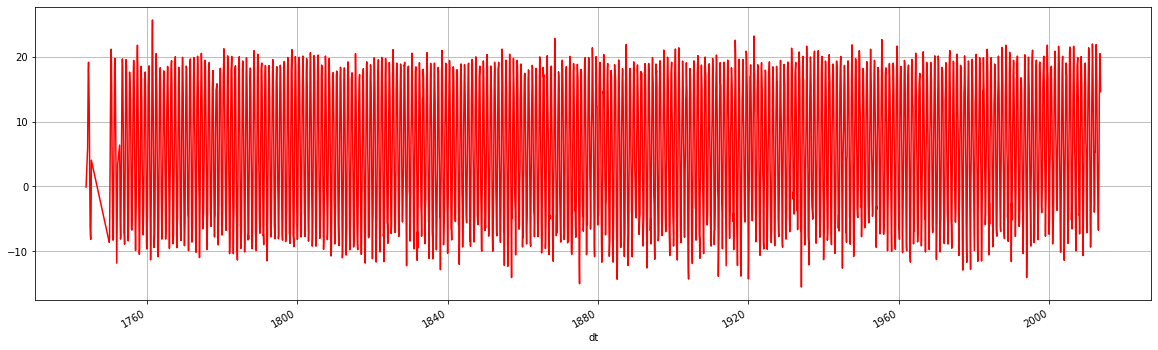

In [177]:
toronto["AverageTemperature"].plot(figsize=(20,6), color="red", grid =True)

In [178]:
from statsmodels.tsa.stattools import adfuller

In [179]:
#check for stationary data


In [180]:
def adfuller_test(toronto):
    result=adfuller(toronto)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [181]:
adfuller_test(toronto)

ADF Test Statistic : -5.677761476425831
p-value : 8.625756083252744e-07
#Lags Used : 28
Number of Observations Used : 3112
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [182]:
#p-value : 8.625756083252744e-07

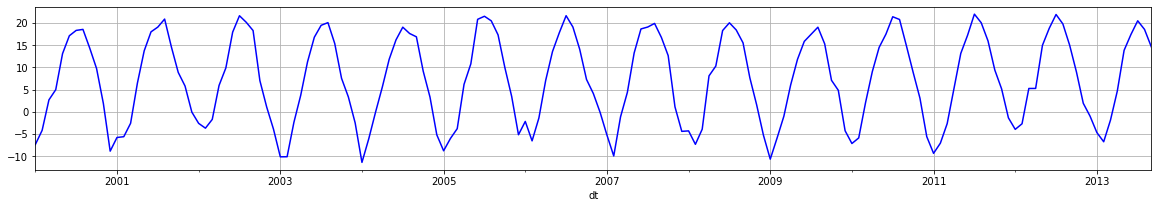

In [183]:
toronto.loc["2000-01-01":"2013-12-01"]["AverageTemperature"].plot(figsize=(20,3), color="blue", grid =True)

# REMOVING SEASONALITY

### differencing method to make the series Stationairy 

In [389]:
# Subtract and then shift by1

In [185]:
toronto['AverageTemperature_diff'] = toronto['AverageTemperature'] - toronto['AverageTemperature'].shift(1)

In [186]:
toronto['AverageTemperature_diff']

dt
1743-11-01      NaN
1744-04-01    5.998
1744-05-01    6.158
1744-06-01    5.807
1744-07-01    1.273
              ...  
2013-05-01    9.161
2013-06-01    3.549
2013-07-01    3.093
2013-08-01   -1.940
2013-09-01   -3.921
Name: AverageTemperature_diff, Length: 3141, dtype: float64

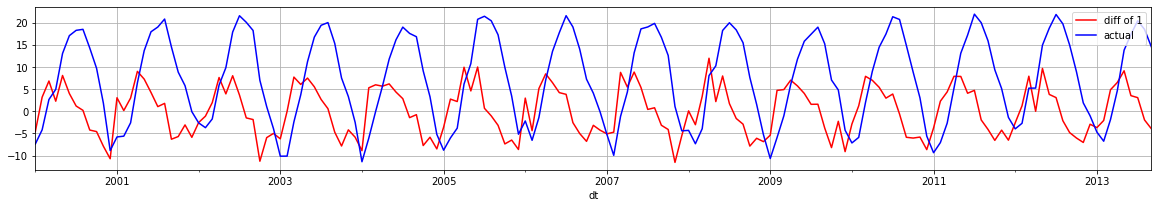

In [187]:
toronto.loc["2000-01-01":"2013-12-01"]["AverageTemperature_diff"].plot(figsize=(20,3), \
                                                                       color="red", grid =True, label="diff of 1")
toronto.loc["2000-01-01":"2013-12-01"]["AverageTemperature"].plot(figsize=(20,3), \
                                                                  color="blue", grid =True, label="actual")
plt.legend()

In [188]:
toronto['AverageTemperature_diff'] = toronto['AverageTemperature'] - toronto['AverageTemperature'].shift(12)

In [189]:
toronto=toronto.dropna()

In [190]:
toronto

,AverageTemperature,AverageTemperature_diff
dt,,
1745-04-01,4.041,4.147
1750-01-01,-8.613,-14.505
1750-02-01,-7.920,-19.970
1750-03-01,-2.468,-20.325
1750-04-01,4.628,-14.502
...,...,...
2013-05-01,13.818,-1.128
2013-06-01,17.367,-1.404
2013-07-01,20.460,-1.416


In [191]:
#SHIFT OF 12 

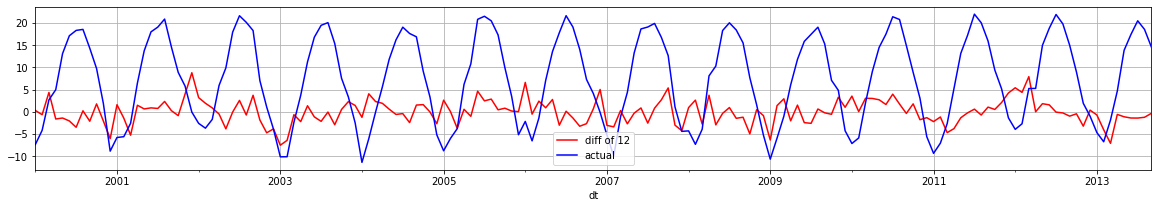

In [192]:
toronto.loc["2000-01-01":"2013-12-01"]["AverageTemperature_diff"].plot(figsize=(20,3), \
                                                                       color="red", grid =True, label="diff of 12")
toronto.loc["2000-01-01":"2013-12-01"]["AverageTemperature"].plot(figsize=(20,3), \
                                                                  color="blue", grid =True, label="actual")
plt.legend()


In [193]:
adfuller_test(toronto['AverageTemperature_diff'].dropna())

ADF Test Statistic : -16.146434673535726
p-value : 4.617931384840907e-29
#Lags Used : 28
Number of Observations Used : 3100
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [194]:
#p-value : 4.617931384840907e-29

In [198]:
int(4.617931384840907e-29)

0

In [390]:
#highest coorelation is at 1

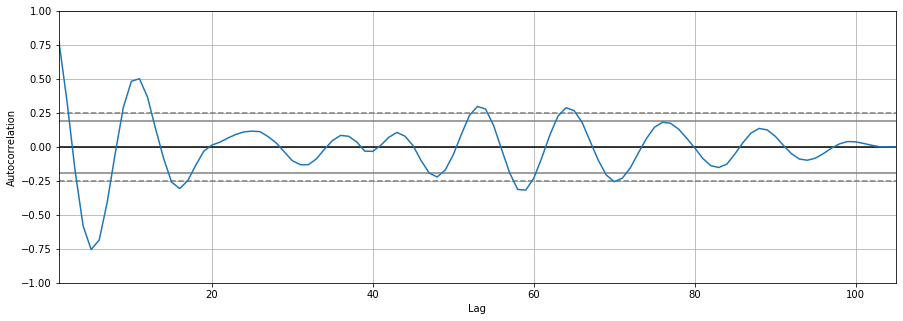

In [395]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(toronto.loc["1745-04-01":"1760-04-01"]["AverageTemperature"])
plt.show()

In [204]:
import statsmodels.api as sm

In [205]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

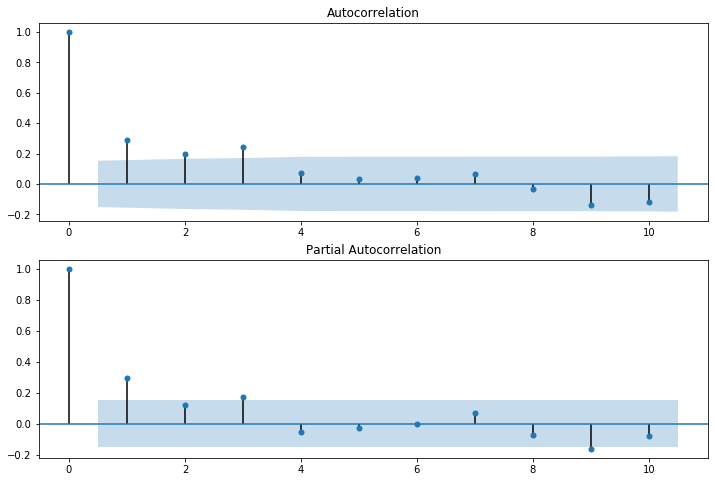

In [210]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(toronto.loc["2000-01-01":"2013-12-01"]["AverageTemperature_diff"],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(toronto.loc["2000-01-01":"2013-12-01"]["AverageTemperature_diff"],lags=10,ax=ax2)

In [211]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [213]:
model=ARIMA(toronto.loc["2000-01-01":"2013-12-01"]["AverageTemperature"],order=(1,1,0))
model_fit=model.fit()

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferr

In [214]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D.AverageTemperature   No. Observations:                  164
Model:                   ARIMA(1, 1, 0)   Log Likelihood                -469.687
Method:                         css-mle   S.D. of innovations              4.235
Date:                  Sat, 12 Dec 2020   AIC                            945.374
Time:                          13:06:05   BIC                            954.674
Sample:                      02-01-2000   HQIC                           949.150
                           - 09-01-2013                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1238      0.887      0.140      0.889      -1.615       1.863
ar.L1.D.AverageTemperature     0.6310      0.060     10.487      0.000       0.513       0.749
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5847           +0.0000j            1.5847            0.0000
-----------------------------------------------------------------------------
"""

In [215]:
toronto

,AverageTemperature,AverageTemperature_diff
dt,,
1745-04-01,4.041,4.147
1750-01-01,-8.613,-14.505
1750-02-01,-7.920,-19.970
1750-03-01,-2.468,-20.325
1750-04-01,4.628,-14.502
...,...,...
2013-05-01,13.818,-1.128
2013-06-01,17.367,-1.404
2013-07-01,20.460,-1.416


In [222]:
toronto['forecast']=model_fit.predict(start="2012-05-01",end="2013-09-01",dynamic=True)


/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


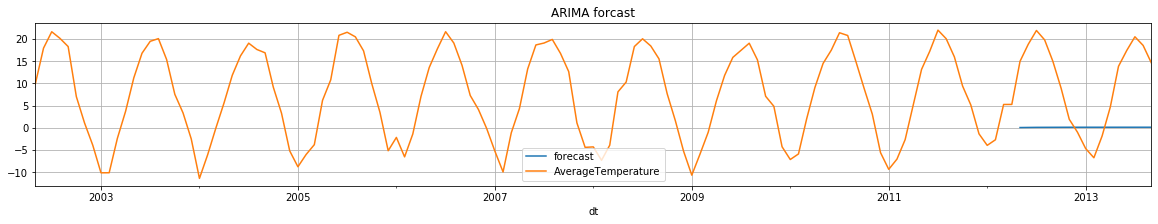

In [234]:
toronto[['forecast',"AverageTemperature"]]["2002-05-01":"2013-12-01"].plot(figsize=(20,3), \
                                                                       grid =True, title="ARIMA forcast"
                                                                          )
plt.show()

In [235]:
import statsmodels.api as sm


In [299]:
model=sm.tsa.statespace.SARIMAX(toronto.loc["2000-01-01":"2013-12-01"]["AverageTemperature"]\
                                ,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [297]:
toronto['forecast']=results.predict(start="2012-05-01",end="2013-09-01",dynamic=True)

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


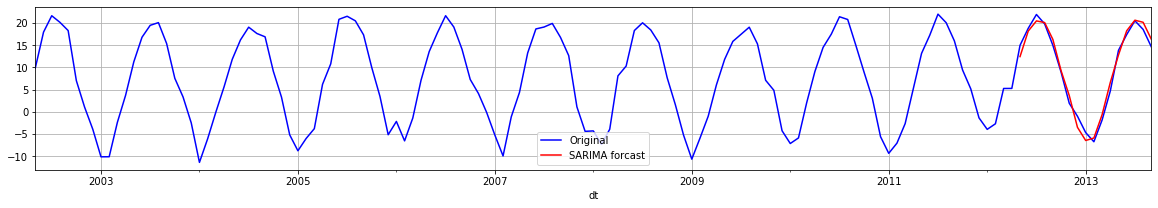

In [298]:
toronto['AverageTemperature']["2002-05-01":"2013-12-01"].plot(figsize=(20,3), color="blue",\
                                                                       grid =True, label="Original"
                                                                          )
toronto['forecast']["2002-05-01":"2013-12-01"].plot(figsize=(20,3), color="red",\
                                                                       grid =True, label="SARIMA forcast"
                                                                          )
plt.legend()

In [256]:
from pandas.tseries.offsets import DateOffset


In [257]:
future_dates=[toronto.index[-1]+ DateOffset(months=x)for x in range(0,98)]

In [258]:
len(future_dates)

98

In [266]:
future_dates[-10:]

[Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00')]

In [267]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=toronto.columns)

In [268]:
future_datest_df

,AverageTemperature,AverageTemperature_diff,forecast
2013-10-01,NaN,NaN,NaN
2013-11-01,NaN,NaN,NaN
2013-12-01,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN
2014-02-01,NaN,NaN,NaN
...,...,...,...
2021-06-01,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN
2021-08-01,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN


In [269]:
future_temperature=pd.concat([toronto,future_datest_df])

In [270]:
future_temperature

,AverageTemperature,AverageTemperature_diff,forecast
1745-04-01,4.041,4.147,NaN
1750-01-01,-8.613,-14.505,NaN
1750-02-01,-7.920,-19.970,NaN
1750-03-01,-2.468,-20.325,NaN
1750-04-01,4.628,-14.502,NaN
...,...,...,...
2021-06-01,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN
2021-08-01,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN


In [287]:
future_temperature.tail(20)

,AverageTemperature,AverageTemperature_diff,forecast
2020-03-01,NaN,NaN,-4.569124
2020-04-01,NaN,NaN,-0.017875
2020-05-01,NaN,NaN,9.304991
2020-06-01,NaN,NaN,12.937235
2020-07-01,NaN,NaN,16.033943
2020-08-01,NaN,NaN,14.040403
2020-09-01,NaN,NaN,9.852493
2020-10-01,NaN,NaN,3.498000
2020-11-01,NaN,NaN,-2.616504
2020-12-01,NaN,NaN,-6.640550


In [279]:
future_temperature.shape

(3226, 3)

In [300]:
future_temperature['forecast'] = results.predict(start="2013-10-01",end="2021-10-01", dynamic= True)  


In [319]:
future_temperature["Google"]["2020-12-01"]= -3

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


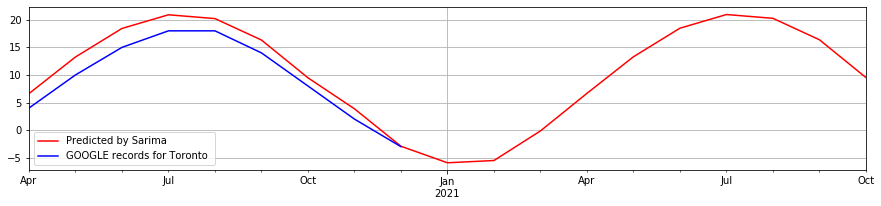

In [325]:
future_temperature['forecast']["2020-04-01":"2021-12-01"].plot(figsize=(15,3), color="red",\
                                                                       grid =True, label="Predicted by Sarima"
  
                                                              )
future_temperature['Google']["2020-04-01":"2020-12-01"].plot(figsize=(15,3), color="blue",\
                                                                       grid =True, label="GOOGLE records for Toronto "
                                                                          )
plt.legend()

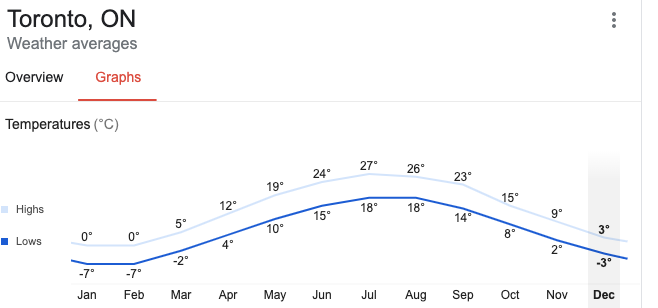

In [ ]:
#EDA ROLLING WINDOW AND MEAN

In [359]:
toronto["roll_mean"]=toronto["AverageTemperature"].rolling(window=2).mean()

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


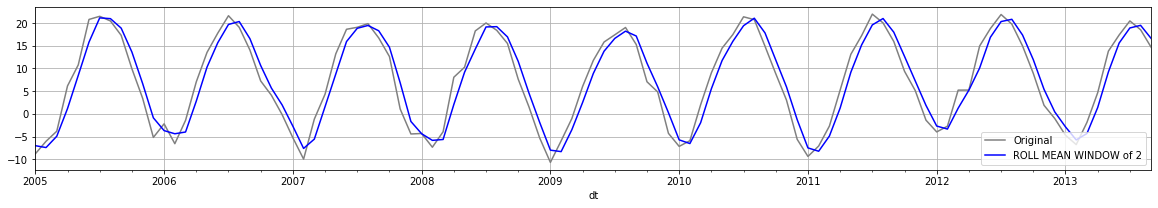

In [366]:
toronto['AverageTemperature']["2005-01-01":"2013-12-01"].plot(figsize=(20,3), color="grey",\
                                                                       grid =True, label="Original"
                                                                          )
toronto['roll_mean']["2005-01-01":"2013-12-01"].plot(figsize=(20,3), color="blue",\
                                                                       grid =True, label="ROLL MEAN WINDOW of 2"
                                                                          )
plt.legend()

In [ ]:
#Rolling window Max

In [367]:
toronto["roll_mean"]=toronto["AverageTemperature"].rolling(window=2).max()

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


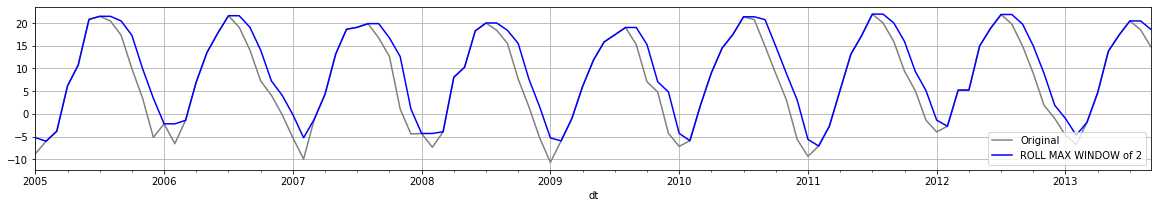

In [369]:
toronto['AverageTemperature']["2005-01-01":"2013-12-01"].plot(figsize=(20,3), color="grey",\
                                                                       grid =True, label="Original"
                                                                          )
toronto['roll_mean']["2005-01-01":"2013-12-01"].plot(figsize=(20,3), color="blue",\
                                                                       grid =True, label="ROLL MAX WINDOW of 2"
                                                                          )
plt.legend()

In [329]:
toronto["year"]=toronto["year"].dt.year

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


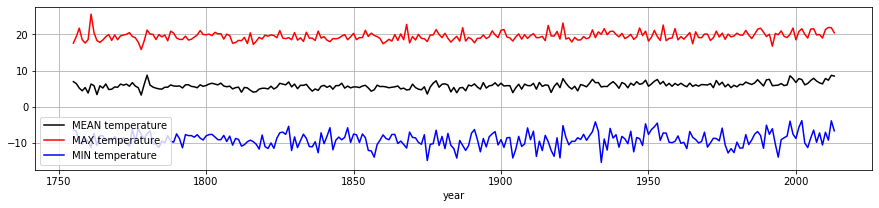

In [353]:
toronto[50:].groupby("year")["AverageTemperature"].mean().plot(figsize=(15,3), color="black",\
                                                                       grid =True, label="MEAN temperature")
toronto[50:].groupby("year")["AverageTemperature"].max().plot(figsize=(15,3), color="red",\
                                                                       grid =True, label="MAX temperature")
toronto[50:].groupby("year")["AverageTemperature"].min().plot(figsize=(15,3), color="blue",\
                                                                       grid =True, label="MIN temperature")
plt.legend(loc="lower left")

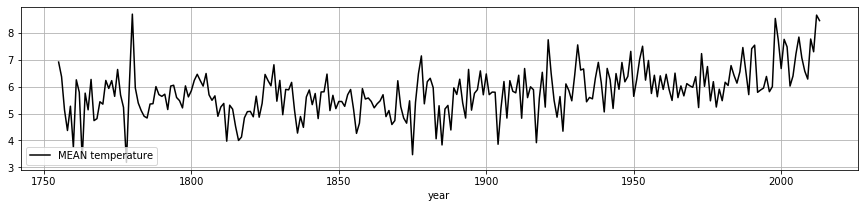

In [354]:
toronto[50:].groupby("year")["AverageTemperature"].mean().plot(figsize=(15,3), color="black",\
                                                                       grid =True, label="MEAN temperature")
plt.legend(loc="lower left")

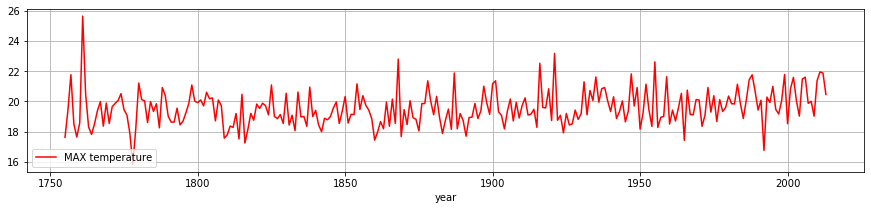

In [355]:
toronto[50:].groupby("year")["AverageTemperature"].max().plot(figsize=(15,3), color="red",\
                                                                       grid =True, label="MAX temperature")
plt.legend(loc="lower left")

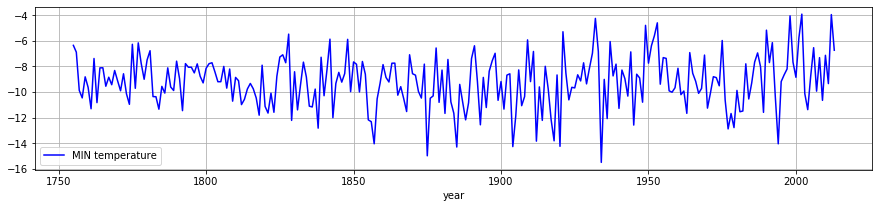

In [356]:
toronto[50:].groupby("year")["AverageTemperature"].min().plot(figsize=(15,3), color="blue",\
                                                                       grid =True, label="MIN temperature")
plt.legend(loc="lower left")

# trendline visualization

In [370]:
import seaborn as sns

In [372]:
toronto2=toronto.copy()

In [373]:
toronto2= toronto2.reset_index()

In [376]:
toronto2.shape

(3129, 6)

In [382]:
plt.rcParams['figure.figsize']=(15,5)

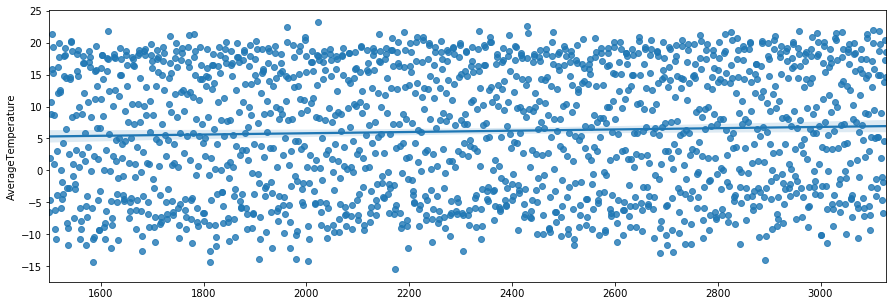

In [383]:
sns.regplot(x= toronto2.index[1500:3129], y=toronto2['AverageTemperature'][1500:3129])

# Autocorelation plot

In [384]:
from pandas.plotting import autocorrelation_plot

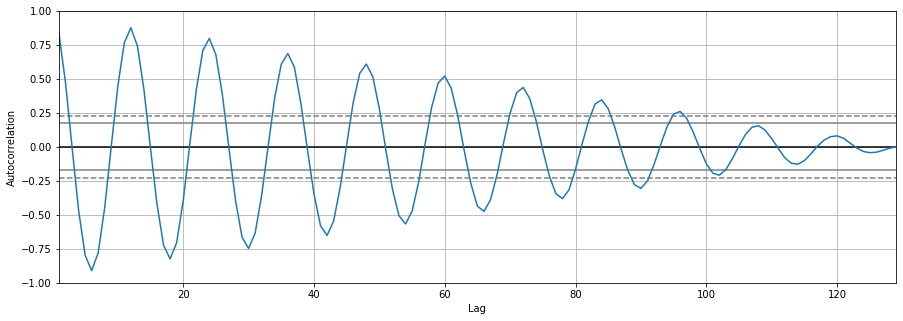

In [388]:
autocorrelation_plot(toronto['AverageTemperature'][3000:3129])